# Exploratory Data Analysis
  - **Univariate Analysis** of all features, identify dependent and independent variable(s)
  - **Bivariate Analysis** of each dependent variables vs the independent variable

In [104]:
#imports
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation

%matplotlib inline

In [6]:
# load data

tourism_df = pd.read_csv('../data/intermediate/cleaned_tourism.csv',index_col=0)
tourism_df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,39.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [129]:
#create dataframe without the  income outliers

no_income_outlier_df = tourism_df[(tourism_df['MonthlyIncome'] < 50000) & (tourism_df['MonthlyIncome'] > 10000)]

C:\Users\ingal\AppData\Local\Temp/ipykernel_10400/73262443.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  tourism_df.iloc[:,1:29].hist(ax=ax);


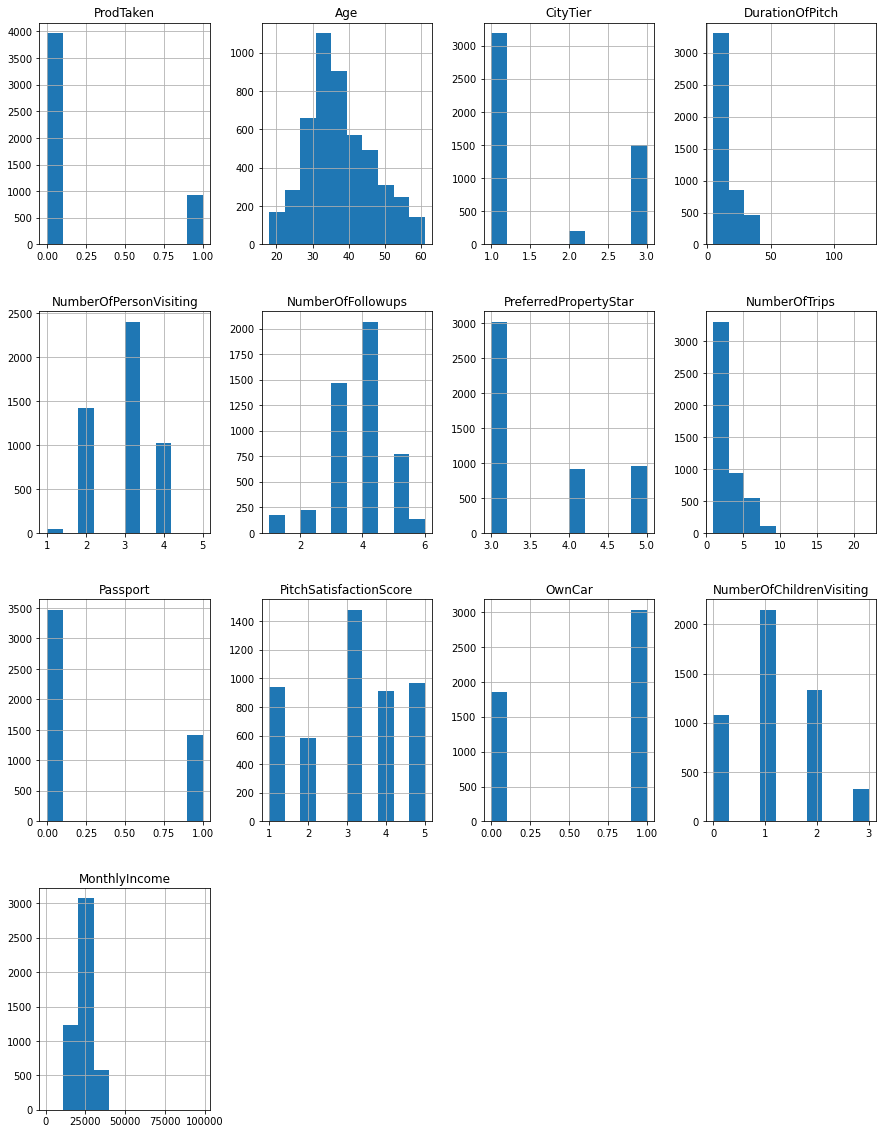

In [108]:
fig = plt.figure(figsize = (15,20));
ax = fig.gca();
tourism_df.iloc[:,1:29].hist(ax=ax);

There is definitely skew of data with our discrete variables (Number of Children Visiting, Number of Trips, PitchSatisfactionScore). 

While Age has a normal distribution, other continuous variables such as MonthlyIncome and Duration of Pitch are skewed to a right-skewed distribution.

The categorical (yes/no) data is not evenly distributed. For example, Passport has about double the records of no than as yes. Similar, OwnCar has about 2/5 no to 3/5 yes.

C:\Users\ingal\AppData\Local\Temp/ipykernel_10400/231225016.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


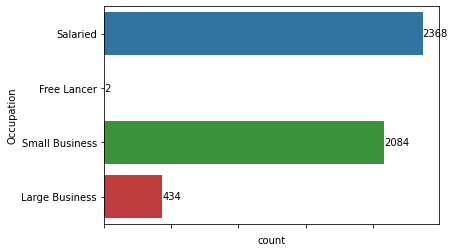

In [147]:
ax = sns.countplot(data=tourism_df, y='Occupation')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
for i in ax.containers:
    ax.bar_label(i,)

I'm still unsure about this feature. I can't tell if it means they own a small business or work at a small business. I would definitely need to go back to the source to understand this better before implementing it into the model. For now we will leave it out.

C:\Users\ingal\AppData\Local\Temp/ipykernel_10400/1175745626.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


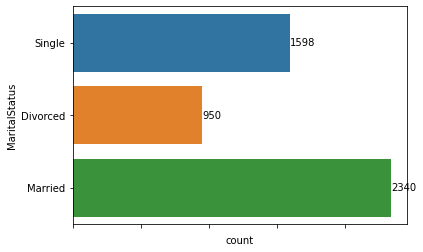

In [148]:
ax = sns.countplot(data=tourism_df, y='MaritalStatus')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
for i in ax.containers:
    ax.bar_label(i,)

C:\Users\ingal\AppData\Local\Temp/ipykernel_10400/3232944463.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


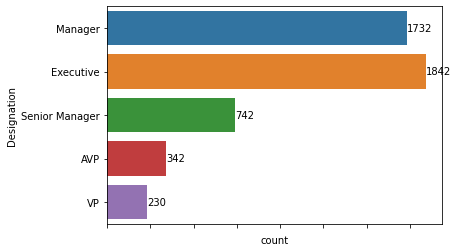

In [149]:
ax = sns.countplot(data=tourism_df, y='Designation')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
for i in ax.containers:
    ax.bar_label(i,)

C:\Users\ingal\AppData\Local\Temp/ipykernel_10400/37800736.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


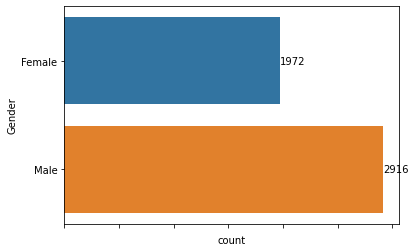

In [150]:
ax = sns.countplot(data=tourism_df, y='Gender')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
for i in ax.containers:
    ax.bar_label(i,)

C:\Users\ingal\AppData\Local\Temp/ipykernel_10400/3605929434.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


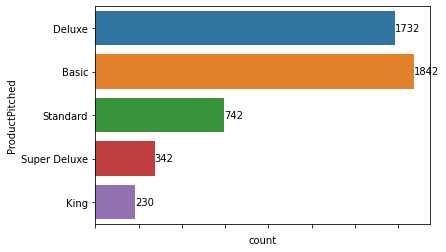

In [152]:
ax = sns.countplot(data=tourism_df, y='ProductPitched')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
for i in ax.containers:
    ax.bar_label(i,)

The majority of packages pitched to customers were Deluxe and Basic. This is interesting since they are on either side of "standard" package. I'm thinking the sales reps either tried to upsell the individual after learning more about them, or downsell if they weren't buying the Standard package. 

Less individuals were offered the Super Deluxe and King combined when compared to the Standard package. This may speak to the sales team's commitment to the product. It's possible, they don't even see the value in these two offers, so they are less likely to offer to the client.

C:\Users\ingal\AppData\Local\Temp/ipykernel_10400/1293001513.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


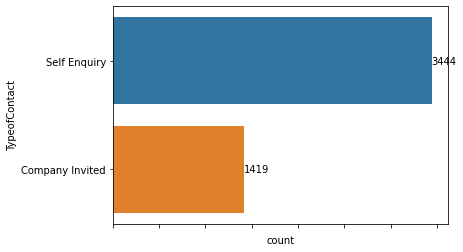

In [154]:
ax = sns.countplot(data=tourism_df, y='TypeofContact')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
for i in ax.containers:
    ax.bar_label(i,)

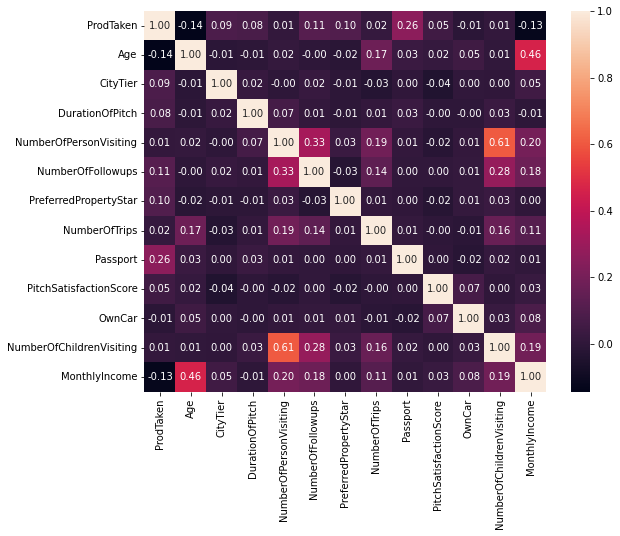

In [111]:
# heatmap correlation of variables, removed CustomerID
fig = plt.figure(figsize = (9,7));
sns.heatmap(tourism_df.iloc[:,1:29].corr(), annot = True, fmt = '.2f');

There doesn't appear to be strong correlations between variables. People Visiting and Children Visiting have a slight correlation, which makes sense considering Children Visiting is most likely included in People Visiting. It may mean that we only need People Visiting for our feature engineering. 

Age and MonthlyIncome have a slight correlation, which we knew as well.

Interesting to see that there is a slight correlation with number of followups and number of people visiting. Indicating it required more back and forth when there were more people involved in the vacation.

As far as whether the product was accepted or not, the strongest correlation was with whether or not there was a passport. I wonder if they were being pitched on international vacations?

c:\Users\ingal\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


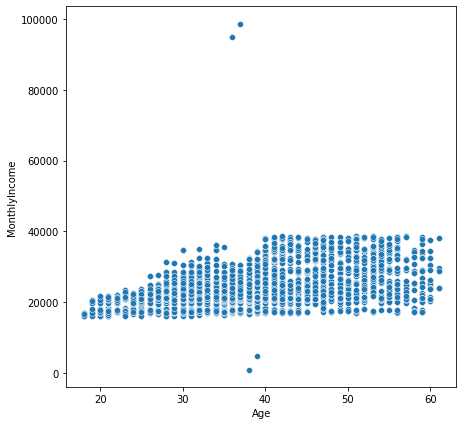

In [13]:
fig = plt.figure(figsize = (7,7));
ax = sns.scatterplot(tourism_df['Age'], tourism_df['MonthlyIncome'])

Here we can see those large monthlyIncome outliers come into play, chage this to a line graph to get a better representation of the trend.

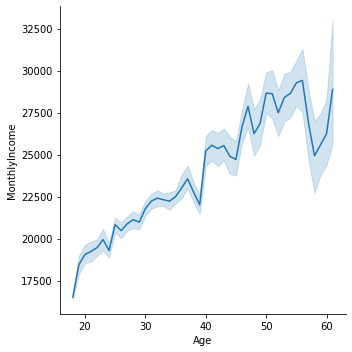

In [112]:
sns.relplot(x = 'Age', y = 'MonthlyIncome', kind = 'line', data = tourism_df)


This shows a tight confidence interval sub 40 years old and a decent correlation, which we saw in the heatmap. It may be that those points are removed for our model.

# Difference in Product Taken vs. Denied
Is there anything noticable when we look at whether or not a consumer bought a package?

<AxesSubplot:xlabel='ProdTaken', ylabel='DurationOfPitch'>

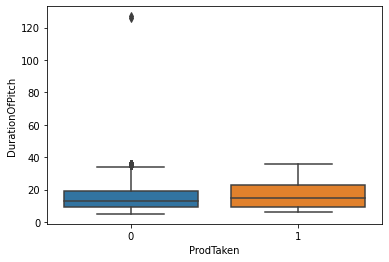

In [122]:
#comparison of product accepted based number of minutes pitching

sns.boxplot(data=tourism_df, x='ProdTaken', y='DurationOfPitch')


<AxesSubplot:xlabel='ProdTaken', ylabel='MonthlyIncome'>

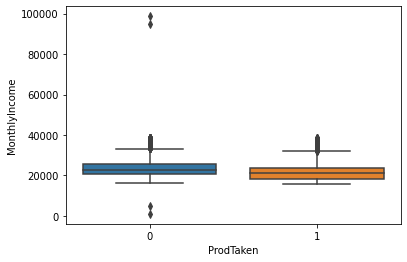

In [24]:
sns.boxplot(data=tourism_df, x='ProdTaken', y='MonthlyIncome')

<AxesSubplot:xlabel='ProdTaken', ylabel='Age'>

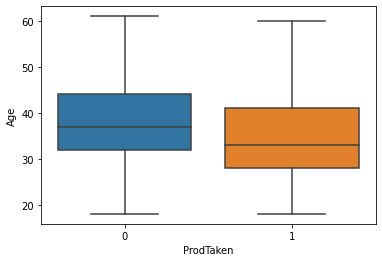

In [25]:
sns.boxplot(data=tourism_df, x='ProdTaken', y='Age')

<AxesSubplot:xlabel='ProdTaken', ylabel='NumberOfTrips'>

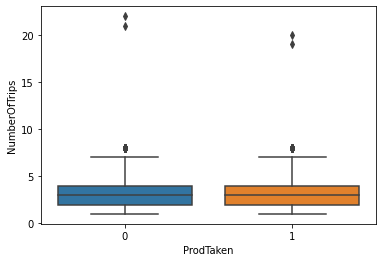

In [26]:
sns.boxplot(data=tourism_df, x='ProdTaken', y='NumberOfTrips')

<AxesSubplot:xlabel='ProdTaken', ylabel='NumberOfChildrenVisiting'>

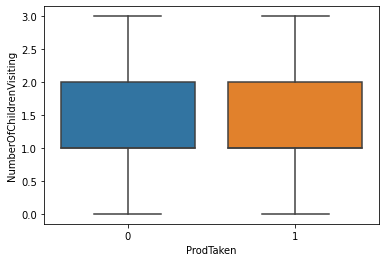

In [29]:
sns.boxplot(data=tourism_df, x='ProdTaken', y='NumberOfChildrenVisiting')

<AxesSubplot:xlabel='ProdTaken', ylabel='NumberOfPersonVisiting'>

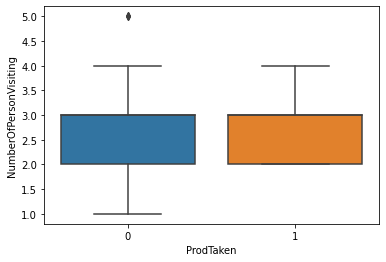

In [32]:
sns.boxplot(data=tourism_df, x='ProdTaken', y='NumberOfPersonVisiting')

<AxesSubplot:xlabel='ProdTaken', ylabel='PitchSatisfactionScore'>

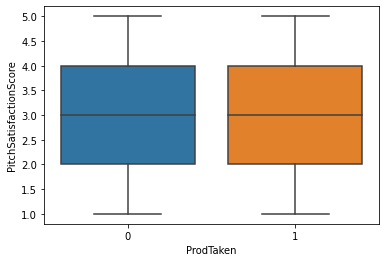

In [37]:
sns.boxplot(data=tourism_df, x='ProdTaken', y='PitchSatisfactionScore')

As I suspected, there isn't any difference in their pitch satisfaction when they accept vs. deny the product. 

<AxesSubplot:xlabel='Age', ylabel='MonthlyIncome'>

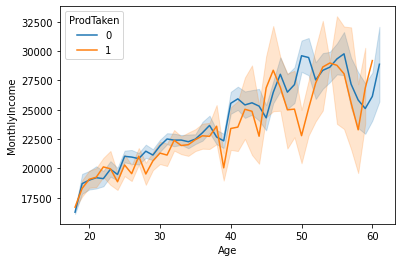

In [36]:
sns.lineplot(data=tourism_df, x= 'Age', y='MonthlyIncome',hue='ProdTaken')

There isn't a real difference in categories when the product was taken vs. not taken.

# Offers Pitched

In [39]:
tourism_df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

<AxesSubplot:xlabel='ProductPitched', ylabel='MonthlyIncome'>

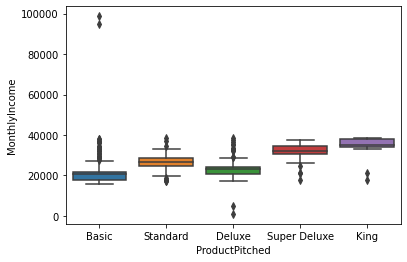

In [41]:
sns.boxplot(data=tourism_df, x='ProductPitched', y='MonthlyIncome', order = ['Basic','Standard','Deluxe','Super Deluxe', 'King'])

<AxesSubplot:xlabel='ProductPitched', ylabel='MonthlyIncome'>

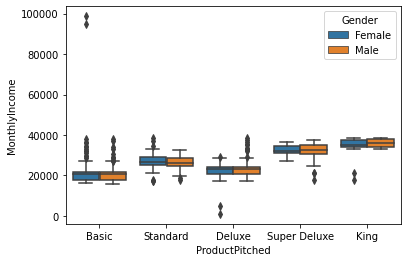

In [52]:
sns.boxplot(data=tourism_df, x='ProductPitched', y='MonthlyIncome', hue='Gender', order = ['Basic','Standard','Deluxe','Super Deluxe', 'King'])

<AxesSubplot:xlabel='ProductPitched', ylabel='Age'>

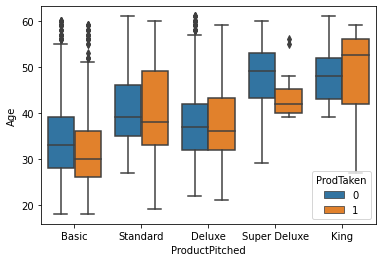

In [48]:
sns.boxplot(data=tourism_df, x='ProductPitched', y='Age', hue = 'ProdTaken', order = ['Basic','Standard','Deluxe','Super Deluxe', 'King'])

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Basic v.s. Standard: Welch's t-test independent samples with Bonferroni correction, P_val=1.258e-77 stat=-2.000e+01
Deluxe v.s. Standard: Welch's t-test independent samples with Bonferroni correction, P_val=5.277e-18 stat=-8.940e+00
Deluxe v.s. Super Deluxe: Welch's t-test independent samples with Bonferroni correction, P_val=8.195e-105 stat=-2.744e+01
Basic v.s. King: Welch's t-test independent samples with Bonferroni correction, P_val=8.975e-108 stat=-3.288e+01


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


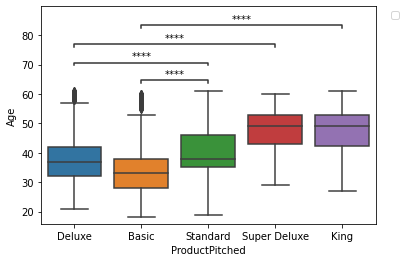

In [80]:
ax = sns.boxplot(data=tourism_df, x='ProductPitched', y='Age')

add_stat_annotation(ax, data=tourism_df, x='ProductPitched', y='Age',
                    box_pairs=[(("Basic"), ("Standard")),
                                 (("Deluxe"), ("Super Deluxe")),
                                 (("King"), ("Basic")),
                                 (("Deluxe"), ("Standard")),
                                ],
                    test='t-test_welch', text_format='star', loc='inside', verbose=2)
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))

It looks as if age plays a large factor in which package they recommend. The older crowd (~50 years) is recommended the higher packages than the younder crowd (~40 years)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Basic_0 v.s. Basic_1: Welch's t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-1.533e+00
Deluxe_0 v.s. Deluxe_1: Welch's t-test independent samples with Bonferroni correction, P_val=3.822e-01 stat=-2.040e+00
Standard_0 v.s. Standard_1: Welch's t-test independent samples with Bonferroni correction, P_val=3.115e-01 stat=2.132e+00
King_0 v.s. King_1: Welch's t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=1.054e+00
Super Deluxe_0 v.s. Super Deluxe_1: Welch's t-test independent samples with Bonferroni correction, P_val=3.951e-02 stat=3.201e+00
Basic_0 v.s. Standard_0: Welch's t-test independent samples with Bonferroni correction, P_val=3.212e-300 stat=-4.638e+01
Deluxe_0 v.s. Standard_0: Welch's t-test independent samples with Bonferroni correction, P_val=6.271e-175 stat=-3

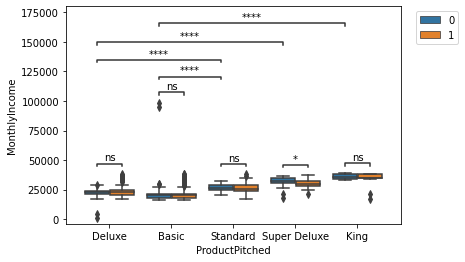

In [85]:
ax = sns.boxplot(data=tourism_df, x='ProductPitched', y='MonthlyIncome', hue = 'ProdTaken')

add_stat_annotation(ax, data=tourism_df, x='ProductPitched', y='MonthlyIncome', hue = 'ProdTaken',
                    box_pairs=[(("Basic",0), ("Standard",0)),
                                 (("Deluxe",0), ("Super Deluxe",0)),
                                 (("King",0), ("Basic",0)),
                                 (("Deluxe",0), ("Standard",0)),
                                 (("King",0),("King",1)),
                                 (("Standard",0),("Standard",1)),
                                 (("Deluxe",0),("Deluxe",1)),
                                 (("Basic",0),("Basic",1)),
                                 (("Super Deluxe",0),("Super Deluxe",1))
                                ],
                    test='t-test_welch', text_format='star', loc='inside', verbose=2)
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))

While there is no difference in MonthlyIncome within a ProductPitch that determined whether or not the product was taken, there were significant difference between each category of ProductPitched, when looking at Monthly Incoome. Meaning the Sales rep used income as another tool to potentiall pick pitch their product to the customer.

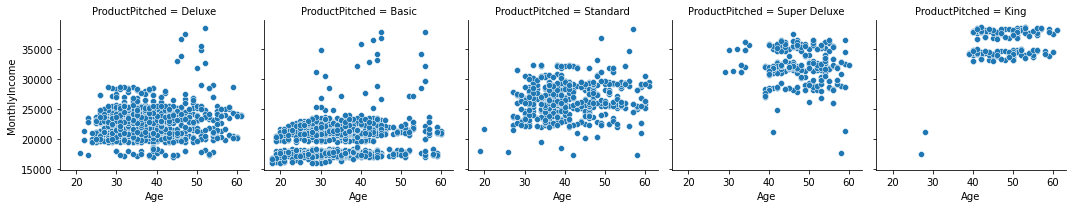

In [130]:
g = sns.FacetGrid(no_income_outlier_df, col="ProductPitched")
g.map_dataframe(sns.scatterplot, x="Age", y="MonthlyIncome")

Are there any patterns here between productTaken?

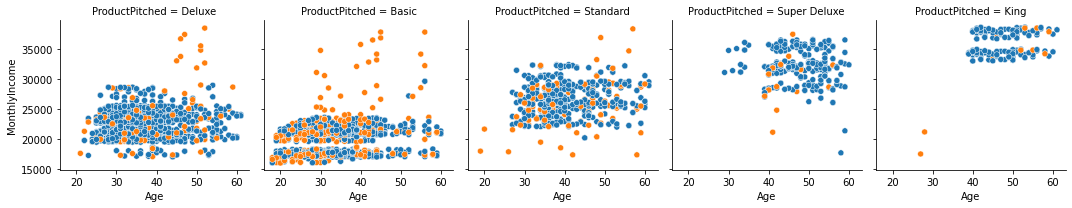

In [131]:
g = sns.FacetGrid(no_income_outlier_df, col="ProductPitched")
g.map_dataframe(sns.scatterplot, x="Age", y="MonthlyIncome", hue= 'ProdTaken')

It's interesting that the majority of the accepted packages come from the Basic package and further, its also when that customer has a high monthly salary. The acceptance rate of the customer, may actually not be about the attributes of the customer, the company may want to look at the package offerings and whether the customer is seeing the value.